In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
df = pd.read_csv("results/grid_summary_etf.csv")

best = (df.sort_values("sharpe_total", ascending=False)
          .head(10)
          .reset_index(drop=True))
best

,sharpe_total,sharpe_invested,pct_time_in_market,max_dd_strategy,total_return_pct,total_return_50_50,sharpe_50_50,max_dd_50_50,pair,entry,exit,window,floor,adf_statistic,p_value
0,1.044053,1.369692,56.759600,-4.332344,5.519400,-4.615177,0.001674,-0.496924,TLT/IEF,2.0,0.05,50,0.0,0.383154,0.980854
1,0.970258,1.642631,34.139926,-3.572405,4.189156,-4.615177,0.001674,-0.496924,TLT/IEF,2.0,0.25,50,0.0,0.383154,0.980854
2,0.952723,1.267388,55.128880,-4.332344,5.052812,-4.615177,0.001674,-0.496924,TLT/IEF,2.0,0.05,50,0.5,0.383154,0.980854
3,0.873790,2.072495,17.464492,-0.375949,4.120606,28.722103,0.265819,-0.483409,EEM/VWO,2.5,0.05,50,0.0,-1.572886,0.497198
4,0.870328,1.825925,22.146239,-0.499555,2.754221,28.722103,0.265819,-0.483409,EEM/VWO,2.5,0.05,60,0.0,-1.572886,0.497198
5,0.859847,2.829616,9.205681,-0.146949,1.529421,28.722103,0.265819,-0.483409,EEM/VWO,3.0,0.25,40,0.0,-1.572886,0.497198
6,0.822118,1.417039,32.877433,-3.572405,3.511577,-4.615177,0.001674,-0.496924,TLT/IEF,2.0,0.25,50,0.5,0.383154,0.980854
7,0.810165,1.178851,45.817991,-0.871703,3.542085,28.722103,0.265819,-0.483409,EEM/VWO,2.0,0.05,60,0.0,-1.572886,0.497198
8,0.792986,1.270224,38.032614,-1.252645,4.007260,28.722103,0.265819,-0.483409,EEM/VWO,2.0,0.05,50,0.0,-1.572886,0.497198
9,0.786973,1.719182,20.620726,-3.128324,3.040473,-4.615177,0.001674,-0.496924,TLT/IEF,2.5,0.25,40,0.0,0.383154,0.980854


In [35]:
df["sharpe_edge"] = df["sharpe_total"] - df["sharpe_50_50"]

best = df.sort_values("sharpe_edge", ascending=False).iloc[0]

print("Best run by Sharpe edge:")
print(best)

Best run by Sharpe edge:
sharpe_total          1.044053
sharpe_invested       1.369692
pct_time_in_market     56.7596
max_dd_strategy      -4.332344
total_return_pct        5.5194
total_return_50_50   -4.615177
sharpe_50_50          0.001674
max_dd_50_50         -0.496924
pair                   TLT/IEF
entry                      2.0
exit                      0.05
window                      50
floor                      0.0
adf_statistic         0.383154
p_value               0.980854
sharpe_edge           1.042379
Name: 146, dtype: object


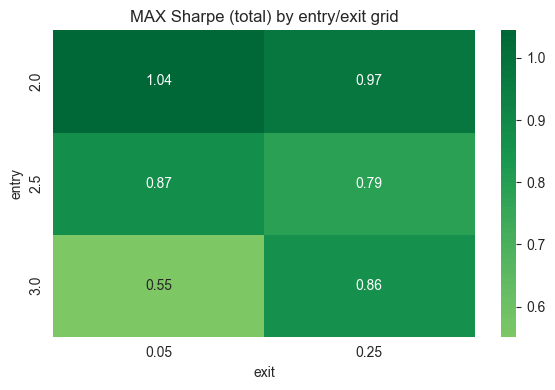

In [36]:
pivot = df.pivot_table(index="entry",
                       columns="exit",
                       values="sharpe_total",
                       aggfunc="max")

plt.figure(figsize=(6,4))
sns.heatmap(pivot, annot=True, fmt=".2f", cmap="RdYlGn", center=0)
plt.title("MAX Sharpe (total) by entry/exit grid")
plt.tight_layout()
plt.savefig("figs/heat_entry_exit_max.png", dpi=150)
plt.show()
plt.close()

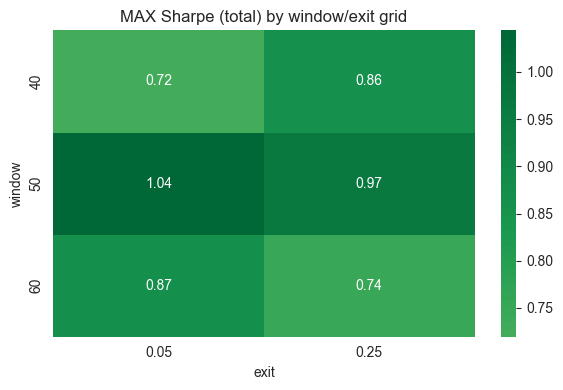

In [37]:
pivot = df.pivot_table(index="window",
                       columns="exit",
                       values="sharpe_total",
                       aggfunc="max")

plt.figure(figsize=(6,4))
sns.heatmap(pivot, annot=True, fmt=".2f", cmap="RdYlGn", center=0)
plt.title("MAX Sharpe (total) by window/exit grid")
plt.tight_layout()
plt.savefig("figs/heat_window_exit_max.png", dpi=150)
plt.show()
plt.close()

We now want to understand whether the ADF statistics that we considered in the beginning of our analysis is a good predictor for the performance of the pairs trading strategy.

In [38]:
pair_performance = (df.sort_values("sharpe_total", ascending=False)
             .groupby("pair", as_index=False)
             .first())

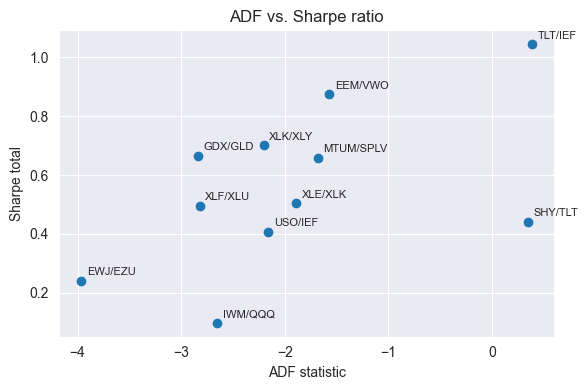

In [39]:
fig, ax = plt.subplots(figsize=(6,4))

ax.scatter(pair_performance["adf_statistic"],
           pair_performance["sharpe_total"])

# --- label each point with the pair name ---
for _, row in pair_performance.iterrows():
    ax.annotate(row["pair"],                 # text
                (row["adf_statistic"],       # x-y
                 row["sharpe_total"]),
                textcoords="offset points",  # place relative to point
                xytext=(4, 4),               # offset (px)
                ha="left", fontsize=8)

ax.set_xlabel("ADF statistic")
ax.set_ylabel("Sharpe total")
ax.set_title("ADF vs. Sharpe ratio")
plt.tight_layout()
plt.savefig("figs/adf_vs_sharpe_total.png", dpi=150)
plt.show()

In [40]:
pair_performance["adf_statistic"].corr(pair_performance["sharpe_total"])

np.float64(0.5438772957899941)

Apparently the ADF statistic is not a good predictor for the performance of the pairs trading strategy. We will now continue to investigate the decisions of the strategy by looking at the example of the pair **TLT/IEF**.

In [41]:
best

sharpe_total          1.044053
sharpe_invested       1.369692
pct_time_in_market     56.7596
max_dd_strategy      -4.332344
total_return_pct        5.5194
total_return_50_50   -4.615177
sharpe_50_50          0.001674
max_dd_50_50         -0.496924
pair                   TLT/IEF
entry                      2.0
exit                      0.05
window                      50
floor                      0.0
adf_statistic         0.383154
p_value               0.980854
sharpe_edge           1.042379
Name: 146, dtype: object

In [42]:
import matplotlib.pyplot as plt
from src.data import get_pair_prices
from src.model import fit_rolling_ols, z_score, generate_signals, SignalParams
from src.backtest import BacktestEngine

symbol_a = "TLT"
symbol_b = "IEF"

entry_threshold = 2.0
exit_threshold = 0.05
window = 50
abs_floor = 0.0

price_df = get_pair_prices([symbol_a, symbol_b], type='etf')
alpha, beta = fit_rolling_ols(price_df[symbol_a], price_df[symbol_b], window=window)
residuals = (price_df[symbol_a] - (alpha + beta*price_df[symbol_b])).dropna()
z = z_score(residuals, window=window)
sig = generate_signals(z, residuals, SignalParams(entry_threshold, exit_threshold, abs_floor))
result = BacktestEngine(price_df).run(sig, beta)
result = result.join(z.rename("z_score"))

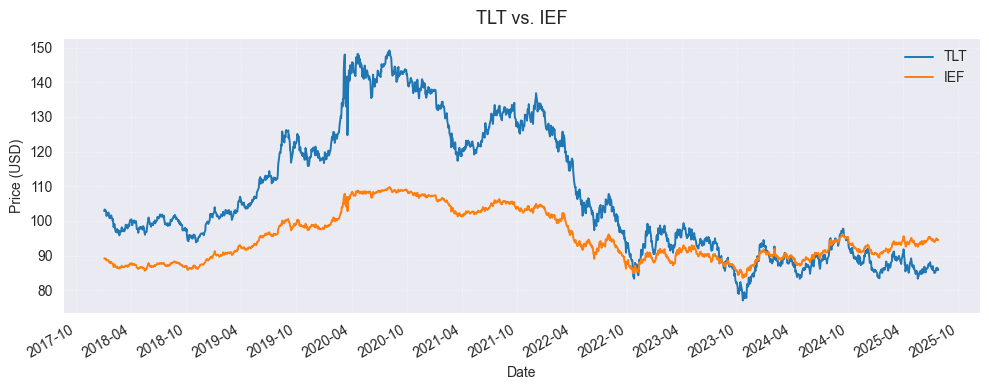

In [43]:
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(10, 4))

ax.plot(result.index, result[symbol_a], lw=1.4, label=symbol_a, color="#1f77b4")
ax.plot(result.index, result[symbol_b], lw=1.4, label=symbol_b, color="#ff7f0e")

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=6))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
fig.autofmt_xdate()

ax.set_title(f"{symbol_a} vs. {symbol_b}", fontsize=13, pad=10)
ax.set_xlabel("Date")
ax.set_ylabel("Price (USD)")
ax.grid(linestyle="--", linewidth=0.4, alpha=0.6)
ax.legend(frameon=False)

plt.tight_layout()
plt.show()

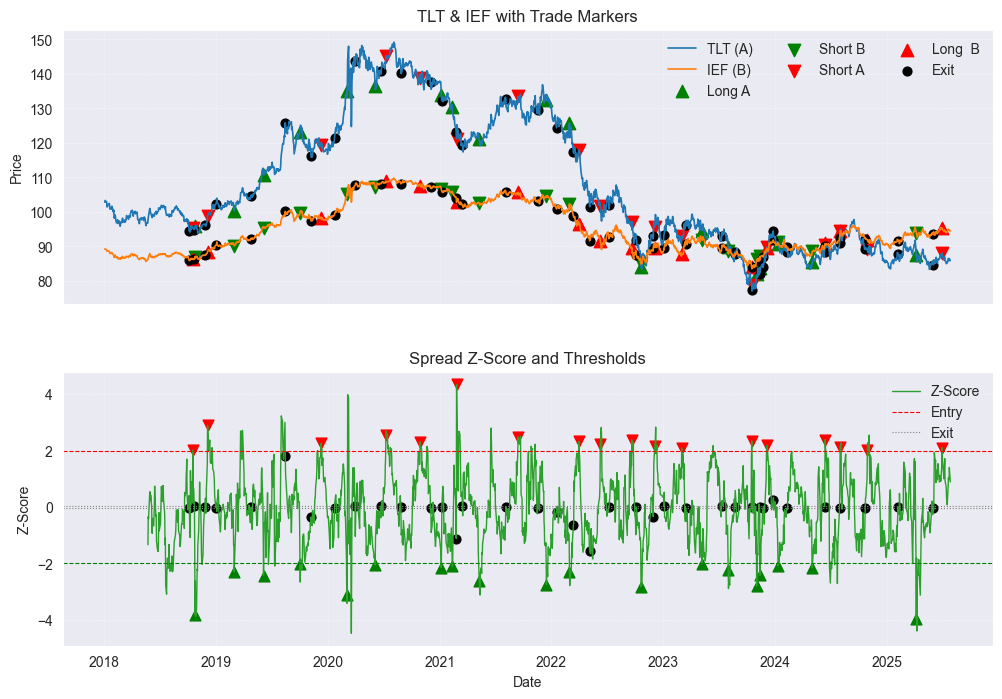

In [44]:
long_entries  = result[(result['position'] ==  1) & (result['position'].shift(1) == 0)]
short_entries = result[(result['position'] == -1) & (result['position'].shift(1) == 0)]
exits         = result[(result['position'] ==  0) & (result['position'].shift(1) != 0)]


fig, (ax_price, ax_z) = plt.subplots(
    2, 1, figsize=(12, 8), sharex=True, gridspec_kw={"hspace": 0.25}
)

ax_price.plot(result.index, result[symbol_a], lw=1.2, label=f"{symbol_a} (A)", color="#1f77b4")
ax_price.plot(result.index, result[symbol_b], lw=1.2, label=f"{symbol_b} (B)", color="#ff7f0e")

ax_price.scatter(long_entries.index,  long_entries[symbol_a], marker="^", color="green",  s=80, label="Long A")
ax_price.scatter(long_entries.index,  long_entries[symbol_b], marker="v", color="green",  s=80, label="Short B")

ax_price.scatter(short_entries.index, short_entries[symbol_a], marker="v", color="red",   s=80, label="Short A")
ax_price.scatter(short_entries.index, short_entries[symbol_b], marker="^", color="red",   s=80, label="Long  B")

ax_price.scatter(exits.index, exits[symbol_a], marker="o", color="black", s=40, label="Exit")
ax_price.scatter(exits.index, exits[symbol_b], marker="o", color="black", s=40)

ax_price.set_ylabel("Price")
ax_price.set_title(f"{symbol_a} & {symbol_b} with Trade Markers")
ax_price.legend(ncol=3, frameon=False)
ax_price.grid(ls="--", lw=0.4, alpha=0.6)

ax_z.plot(result.index, result["z_score"], lw=1, color="#2ca02c", label="Z-Score")
ax_z.axhline(entry_threshold,  color="red",   ls="--", lw=0.8, label="Entry")
ax_z.axhline(-entry_threshold, color="green", ls="--", lw=0.8)
ax_z.axhline(exit_threshold,   color="gray",  ls=":",  lw=0.8, label="Exit")
ax_z.axhline(-exit_threshold,  color="gray",  ls=":",  lw=0.8)

ax_z.scatter(long_entries.index,  long_entries["z_score"], marker="^", color="green", s=60)
ax_z.scatter(short_entries.index, short_entries["z_score"], marker="v", color="red",   s=60)
ax_z.scatter(exits.index,         exits["z_score"],         marker="o", color="black", s=40)

ax_z.set_ylabel("Z-Score")
ax_z.set_title("Spread Z-Score and Thresholds")
ax_z.legend(frameon=False)
ax_z.grid(ls="--", lw=0.4, alpha=0.6)

plt.xlabel("Date")
plt.savefig(f"figs/{symbol_a.lower()}_{symbol_b.lower()}_trades.png", dpi=150, bbox_inches="tight")
plt.show()